In [1]:
import numpy as np
import pandas as pd

import os
import sys
sys.path.insert(0, '..')
import ccal

%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

==================== Computational Cancer Analysis Library ====================
<10:53:20> Checking library dependencies ...
<10:53:20> Using the following libraries (in addition to the Anaconda libraries):
<10:53:20> 	scipy (v0.18.0)
<10:53:20> 	statsmodels (v0.6.1)
<10:53:20> 	scikit-learn (v0.17.1)
<10:53:20> 	seaborn (v0.7.1)
<10:53:20> 	rpy2 (v2.8.2)
<10:53:20> 	pandas (v0.18.1)
<10:53:20> 	matplotlib (v1.5.1)
<10:53:20> 	numpy (v1.11.1)
<10:53:20> Planted a random seed 20121020.


# Define states

In [2]:
h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
ks = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30]
n_clusterings = 10
filepath_prefix = 'output/ccle_hema_k_9_H_{}clustering'.format(n_clusterings)
# labels, memberships, cophenetic_correlation = ccal.analyze.define_states(h, ks, n_clusterings=n_clusterings,
#                                                                              filepath_prefix=filepath_prefix)

# Make Onco-GPS

In [3]:
labels = pd.read_csv(filepath_prefix + '_labels.txt', index_col=0, sep='\t')
memberships = ccal.support.read_gct(filepath_prefix + '_memberships.gct')
annotations = ccal.support.make_random_features(1, memberships.shape[1])

ccal.support.VERBOSE = False

for n_components in [4, 5, 6, 7, 8, 9, 10, 11, 12]:
    #h = ccal.support.make_random_features(n_components, 100)
    h = h.iloc[:n_components, :]
    for n_state in range(1, 21, 5):
        for annotation_type in ['continuous', 'categorical', 'binary']:
            if annotation_type == 'continuous':
                annotations = np.random.random_sample(h.shape[1])
            elif annotation_type == 'categorical':
                annotations = np.random.choice(range(n_state), h.shape[1])
            elif annotation_type == 'binary':
                annotations = np.random.choice(range(2), h.shape[1])
            else:
                raise ValueError('Error in annotation_type.')
            ccal.onco_gps.make_map(h,
                                   np.random.choice(list(range(n_state)), h.shape[1]),
                                   annotations=annotations,
                                   annotation_type=annotation_type)#,
                                   #background_markersize=0, background_mask_markersize=0)

# Project samples

In [4]:
labels = filepath_prefix + '_labels.txt'
state = 12

if os.path.isfile(labels):
    labels = pd.read_csv(labels, index_col=0, sep='\t')
    labels.drop('cophenetic_correlation', axis=1, inplace=True)
    
states = labels.ix[state, :]

<10:53:20> Making Onco-GPS with 9 components, 166 samples, and 12 states: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] ...
<10:53:20> '-0-' normalizing pandas object with axis=1 ...
<10:53:20> '0-1' normalizing pandas object with axis=1 ...
<10:53:20> Converting association to distance (1 - association) ...
<10:53:24> '0-1' normalizing pandas object with axis=0 ...
<10:53:24> Modeled columns by 0.0003977486304175168e^(0.9527092629787737x) + 0.03312059144984009.
<10:53:24> component_pulling_power = 1.953.


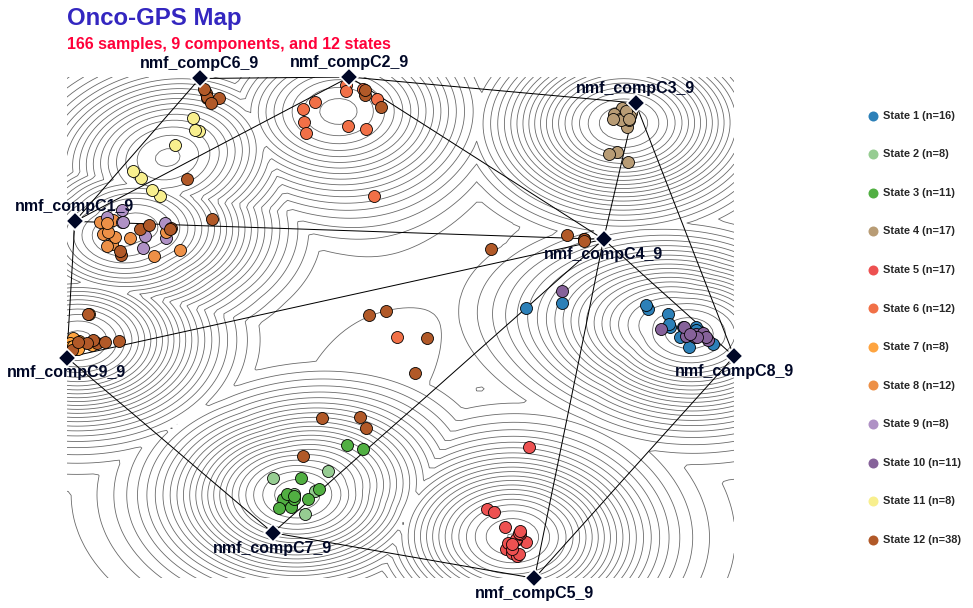

In [5]:
ccal.onco_gps.make_map(h, states, background_markersize=0, background_mask_markersize=0)

<10:53:25> Making Onco-GPS with 9 components, 166 samples, and 12 states: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] ...
<10:53:25> '-0-' normalizing pandas object with axis=1 ...
<10:53:25> '0-1' normalizing pandas object with axis=1 ...
<10:53:25> Converting association to distance (1 - association) ...
<10:53:28> '0-1' normalizing pandas object with axis=0 ...
<10:53:28> Modeled columns by 0.0003977486304175168e^(0.9527092629787737x) + 0.03312059144984009.
<10:53:28> component_pulling_power = 1.953.
<10:53:29> Using samples from testing H matrix ...
<10:53:29> '-0-' normalizing pandas object with axis=1 ...
<10:53:29> '0-1' normalizing pandas object with axis=1 ...


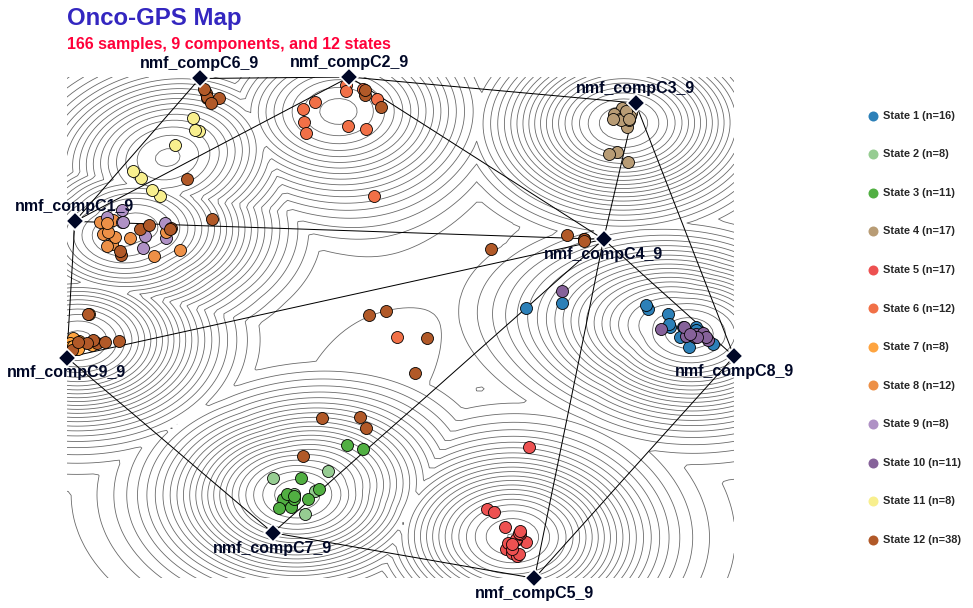

In [6]:
ccal.onco_gps.make_map(h, states, h_test=h, h_test_normalization='b', background_markersize=0, background_mask_markersize=0)

In [13]:
h_test = pd.DataFrame(np.random.random_sample(h.shape)[:, :3])
h_test.columns = ['Sample {}'.format(s + 1) for s in range(h_test.shape[1])]
h_test.index = h.index
h_test

,Sample 1,Sample 2,Sample 3
nmf_compC1_9,0.819136,0.350511,0.628595
nmf_compC2_9,0.156026,0.932429,0.743918
nmf_compC3_9,0.069106,0.877212,0.608095
nmf_compC4_9,0.758697,0.505745,0.787911
nmf_compC5_9,0.941613,0.194627,0.315817
nmf_compC6_9,0.969649,0.098519,0.808139
nmf_compC7_9,0.819231,0.260240,0.820528
nmf_compC8_9,0.446621,0.081768,0.763124
nmf_compC9_9,0.763036,0.265256,0.800648


In [18]:
states_test = states[:h_test.shape[1]]

<11:18:21> Making Onco-GPS with 9 components, 166 samples, and 12 states: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] ...
<11:18:21> '-0-' normalizing pandas object with axis=1 ...
<11:18:21> '0-1' normalizing pandas object with axis=1 ...
<11:18:21> Converting association to distance (1 - association) ...
<11:18:24> '0-1' normalizing pandas object with axis=0 ...
<11:18:24> Modeled columns by 0.0003977486304175168e^(0.9527092629787737x) + 0.03312059144984009.
<11:18:24> component_pulling_power = 1.953.
<11:18:25> Using samples from testing H matrix ...
<11:18:25> '-0-' normalizing pandas object with axis=1 ...
<11:18:25> '0-1' normalizing pandas object with axis=1 ...


ValueError: cannot convert float NaN to integer

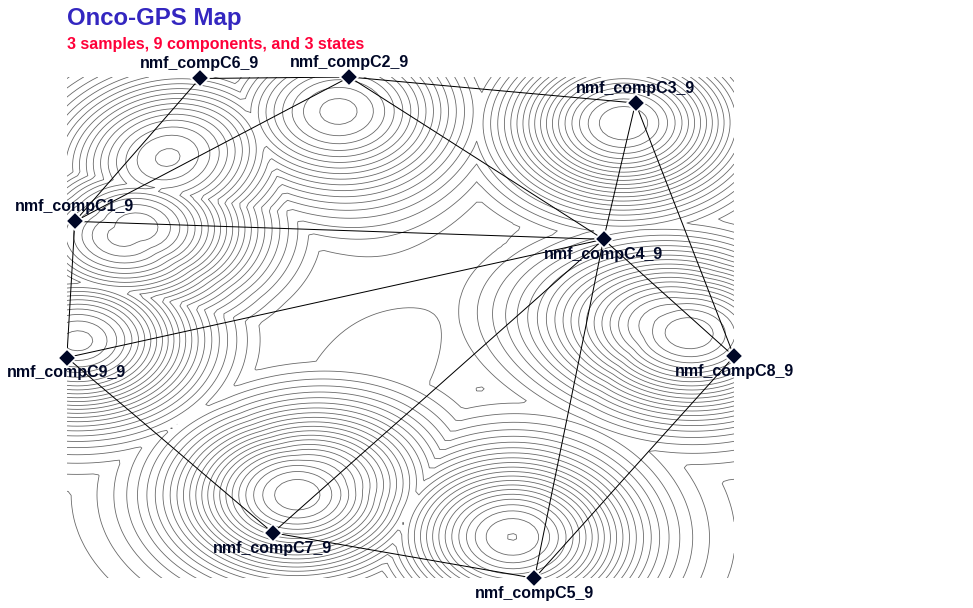

In [20]:
ccal.onco_gps.make_map(h, states, h_test=h_test, h_test_normalization='b', background_markersize=0, background_mask_markersize=0)